This notebook analyzes the responses I retreived from the survey I made. This survey asked college students about their exercise habits, what kind of exercise they do, when do they do it, why do they do it, etc. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rawExerciseDF = pd.read_csv("Student Exercise Habits.csv")
rawExerciseDF.shape

exerciseDF = rawExerciseDF.rename(columns={'What is your gender identity?': 'Gender', 'What is your year?': 'Year',
                                            'What is your age range?': 'Age', 'What is your field of study/work?': 'Field',
                                              'Do you consider yourself an active person?': 'activity_level',
                                                'How would you describe your overall fitness level?': 'fitness_level',
                                                  'What types of physical activity do you participate in? (select all that apply)': 'types_of_activity',
                                                    'How many days in a typical week do you exercise?': 'days_exercised',
                                                    'How long does your typical workout last?': 'exercise_length', 'Which intensity best describes your usual activity?': 'intensity',
                                                    'What equipment or resources do you typically use? (select all that apply)': 'equipment_used',
                                                    'What time of day do you usually exercise?': 'time_of_exercise', 'Why do you exercise at that time of day?': 'why_time',
                                                    'How consistent is your routine?': 'consistency_level', 'Where do you exercise most often?': 'exercise_location',
                                                    'Why do you exercise at that location most often?': 'why_location', 'Do you prefer to exercise alone or with others?': 'alone_or_team',
                                                    'What motivates you to exercise? (select all that apply)': 'motivation', 'What barriers make it difficult to exercise, if any? (select all that apply)': 'barriers',
                                                    'What benefits do you feel from exercising? (select all that apply)': 'benefits'})
exerciseDF.head()

,Timestamp,Age,Year,Field,Gender,activity_level,fitness_level,types_of_activity,days_exercised,exercise_length,...,equipment_used,time_of_exercise,why_time,consistency_level,exercise_location,why_location,alone_or_team,motivation,barriers,benefits
0,2026/02/02 11:55:43 AM EST,21-23,Senior,"Humanities (History, Languages, Literature, Ph...",Woman,No,Somewhat fit,Walking;Yoga,1-2 days,20-40 minutes,...,NaN,Evening,It best fits my school/work schedule;It helps ...,Not very consistent,Outside,It is close to where I live/stay;It is free or...,I prefer to go alone,Health reasons;Stress relief,Lack of time;Lack of motivation,Stress relief;Better mood;Better energy
1,2026/02/02 11:57:54 AM EST,21-23,Senior,English Education,Woman,No,Somewhat fit,Walking,3-4 days,20-40 minutes,...,Outdoor trails,Morning,It best fits my school/work schedule;It helps ...,Not very consistent,Outside,"I like the environment/atmosphere (outdoors, s...",I go with a gym buddy,Health reasons;Stress relief;To gain strength,Lack of motivation;Cost,Stress relief;Better mood;Better energy;Improv...
2,2026/02/02 11:58:41 AM EST,21-23,Senior,"Social Sciences (Sociology, Anthropology, Poli...",Woman,Yes -- I like staying active,Somewhat fit,Weight-lifting;Running;Walking;Yoga,3-4 days,40-60 minutes,...,Free weights;Machines;Fitness classes;Outdoor ...,Evening,It best fits my school/work schedule;The gym/l...,Very consistent,Campus gym,It is close to where I live/stay;It is free or...,I prefer to go alone,Health reasons;Stress relief;Enjoyment;Weight ...,Lack of time;Lack of motivation,Stress relief;Better mood;Better energy;Improv...
3,2026/02/02 12:05:45 PM EST,21-23,Senior,"Fine Arts / Music (Studio Art, Music Education...",Woman,Yes -- I like staying active,Somewhat fit,"Walking;Hiking;Kayaking, roller skating",1-2 days,More than 60 minutes,...,Outdoor trails,Afternoon,I have the most energy during that time,Somewhat consistent,Outside,"I like the environment/atmosphere (outdoors, s...",I prefer to go alone,Stress relief;Social reasons;Enjoyment;To gain...,Lack of time;Tired asf,Stress relief;Better mood;Better energy;Improv...
4,2026/02/02 12:10:01 PM EST,21-23,Senior,"Fine Arts / Music (Studio Art, Music Education...",Woman,No,Somewhat fit,Sports;Running;Walking;Yoga,1-2 days,40-60 minutes,...,Sports equipment;None,Evening,I have the most energy during that time;It hel...,Not very consistent,Outside,"I like the environment/atmosphere (outdoors, s...",I prefer to go alone,Health reasons;Stress relief;Social reasons;En...,Lack of time;Lack of motivation,Stress relief;Better energy;Improved physical ...


I've come back to adjust the "select all that apply" columns so that the semi-colon seperated lines change to lists. This will make it easier to make pie charts from these variables later.

In [3]:
exerciseDF["types_of_activity"] = exerciseDF["types_of_activity"].str.split(";")
exerciseDF["equipment_used"] = exerciseDF["equipment_used"].str.split(";")
exerciseDF["why_time"] = exerciseDF["why_time"].str.split(";")
exerciseDF["why_location"] = exerciseDF["why_location"].str.split(";")
exerciseDF["motivation"] = exerciseDF["motivation"].str.split(";")
exerciseDF["barriers"] = exerciseDF["barriers"].str.split(";")
exerciseDF["benefits"] = exerciseDF["benefits"].str.split(";")

exerciseDF.head()

,Timestamp,Age,Year,Field,Gender,activity_level,fitness_level,types_of_activity,days_exercised,exercise_length,...,equipment_used,time_of_exercise,why_time,consistency_level,exercise_location,why_location,alone_or_team,motivation,barriers,benefits
0,2026/02/02 11:55:43 AM EST,21-23,Senior,"Humanities (History, Languages, Literature, Ph...",Woman,No,Somewhat fit,"[Walking, Yoga]",1-2 days,20-40 minutes,...,NaN,Evening,"[It best fits my school/work schedule, It help...",Not very consistent,Outside,"[It is close to where I live/stay, It is free ...",I prefer to go alone,"[Health reasons, Stress relief]","[Lack of time, Lack of motivation]","[Stress relief, Better mood, Better energy]"
1,2026/02/02 11:57:54 AM EST,21-23,Senior,English Education,Woman,No,Somewhat fit,[Walking],3-4 days,20-40 minutes,...,[Outdoor trails],Morning,"[It best fits my school/work schedule, It help...",Not very consistent,Outside,"[I like the environment/atmosphere (outdoors, ...",I go with a gym buddy,"[Health reasons, Stress relief, To gain strength]","[Lack of motivation, Cost]","[Stress relief, Better mood, Better energy, Im..."
2,2026/02/02 11:58:41 AM EST,21-23,Senior,"Social Sciences (Sociology, Anthropology, Poli...",Woman,Yes -- I like staying active,Somewhat fit,"[Weight-lifting, Running, Walking, Yoga]",3-4 days,40-60 minutes,...,"[Free weights, Machines, Fitness classes, Outd...",Evening,"[It best fits my school/work schedule, The gym...",Very consistent,Campus gym,"[It is close to where I live/stay, It is free ...",I prefer to go alone,"[Health reasons, Stress relief, Enjoyment, Wei...","[Lack of time, Lack of motivation]","[Stress relief, Better mood, Better energy, Im..."
3,2026/02/02 12:05:45 PM EST,21-23,Senior,"Fine Arts / Music (Studio Art, Music Education...",Woman,Yes -- I like staying active,Somewhat fit,"[Walking, Hiking, Kayaking, roller skating]",1-2 days,More than 60 minutes,...,[Outdoor trails],Afternoon,[I have the most energy during that time],Somewhat consistent,Outside,"[I like the environment/atmosphere (outdoors, ...",I prefer to go alone,"[Stress relief, Social reasons, Enjoyment, To ...","[Lack of time, Tired asf]","[Stress relief, Better mood, Better energy, Im..."
4,2026/02/02 12:10:01 PM EST,21-23,Senior,"Fine Arts / Music (Studio Art, Music Education...",Woman,No,Somewhat fit,"[Sports, Running, Walking, Yoga]",1-2 days,40-60 minutes,...,"[Sports equipment, None]",Evening,"[I have the most energy during that time, It h...",Not very consistent,Outside,"[I like the environment/atmosphere (outdoors, ...",I prefer to go alone,"[Health reasons, Stress relief, Social reasons...","[Lack of time, Lack of motivation]","[Stress relief, Better energy, Improved physic..."


<function matplotlib.pyplot.show(close=None, block=None)>

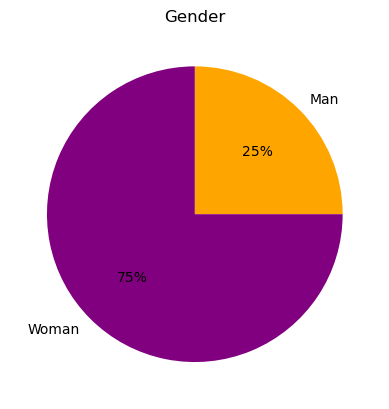

In [4]:
genderGroup = exerciseDF.groupby("Gender")

plt.pie(x=genderGroup.size(), 
        labels=genderGroup.size().index, 
        autopct= "%1.0f%%", 
        colors=["orange", "purple"])
plt.title("Gender")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

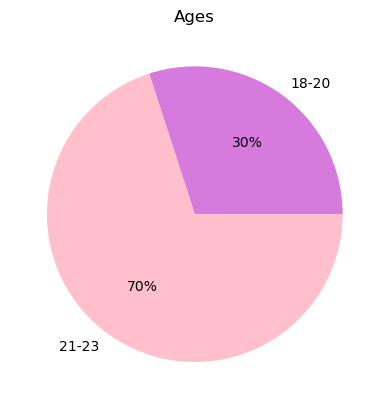

In [5]:
ageGroup = exerciseDF.groupby("Age")

plt.pie(x=ageGroup.size(), 
        labels=ageGroup.size().index, 
        autopct= "%1.0f%%", 
        colors=["#d77ade", "pink"])
plt.title("Ages")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

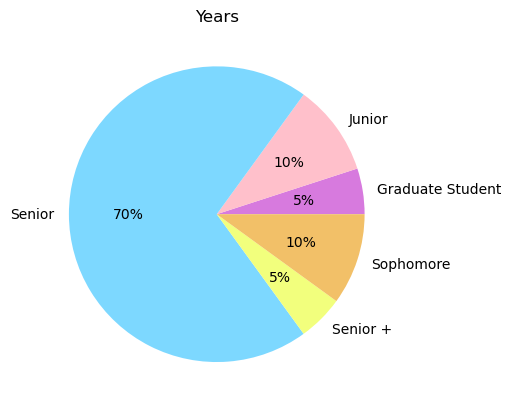

In [6]:
yearGroup = exerciseDF.groupby("Year")

plt.pie(x=yearGroup.size(), 
        labels=yearGroup.size().index, 
        autopct= "%1.0f%%", 
        colors=["#d77ade", "pink", "#7dd8ff", "#f2ff7d", "#f2c068", "#8fffad"])
plt.title("Years")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

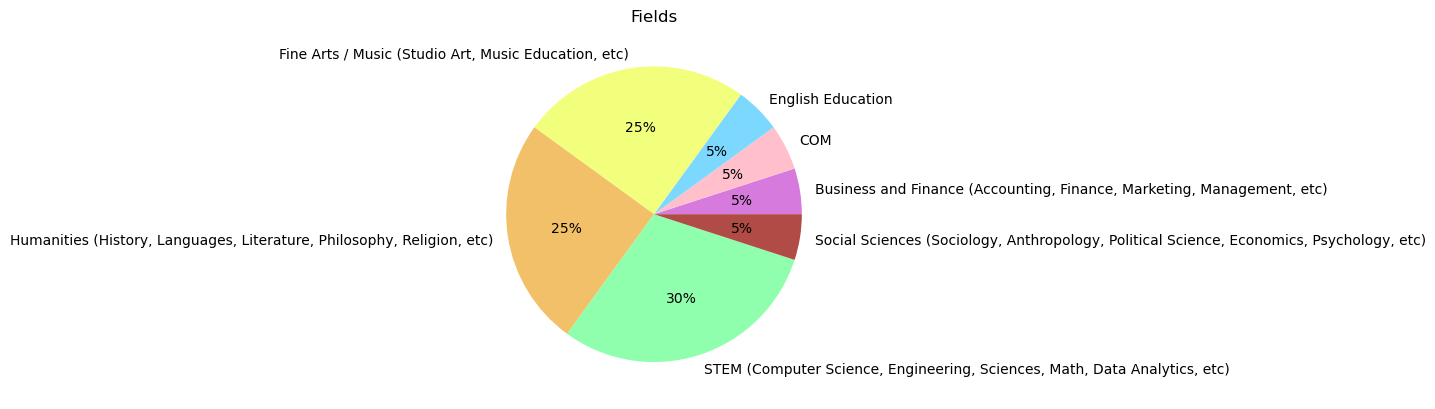

In [7]:
fieldGroup = exerciseDF.groupby("Field")

plt.pie(x=fieldGroup.size(), 
        labels=fieldGroup.size().index, 
        autopct= "%1.0f%%", 
        colors=["#d77ade", "pink", "#7dd8ff", "#f2ff7d", "#f2c068", "#8fffad", "#b04c45"])
plt.title("Fields")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

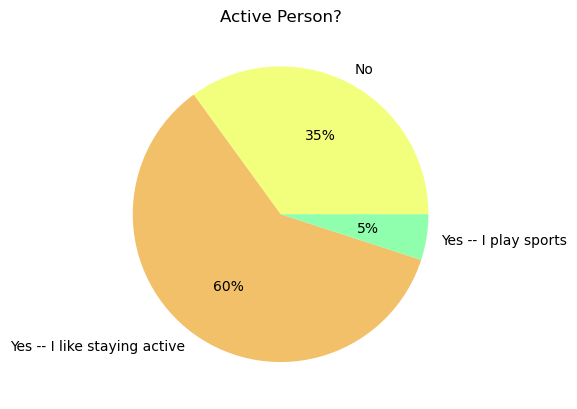

In [8]:
activityGroup = exerciseDF.groupby("activity_level")

plt.pie(x=activityGroup.size(), 
        labels=activityGroup.size().index, 
        autopct= "%1.0f%%", 
        colors=[ "#f2ff7d", "#f2c068", "#8fffad"])
plt.title("Active Person?")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

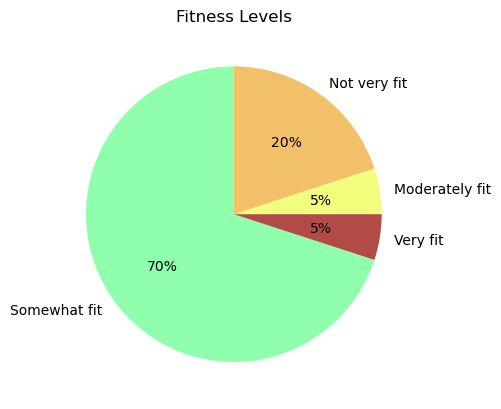

In [9]:
fitnessGroup = exerciseDF.groupby("fitness_level")

plt.pie(x=fitnessGroup.size(), 
        labels=fitnessGroup.size().index, 
        autopct= "%1.0f%%", 
        colors=["#f2ff7d", "#f2c068", "#8fffad", "#b04c45"])
plt.title("Fitness Levels")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

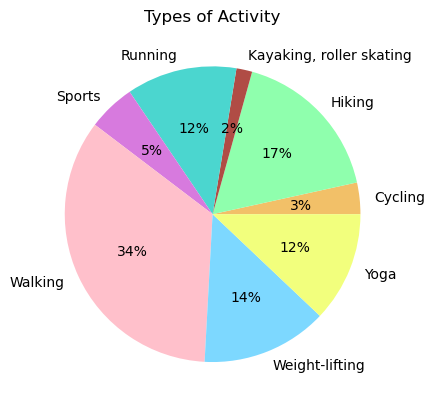

In [10]:
explodedActivity = exerciseDF.explode("types_of_activity")
activity_counts = explodedActivity.groupby("types_of_activity").size()

plt.pie(x=activity_counts, 
        labels=activity_counts.index, 
        autopct= "%1.0f%%", 
        colors=["#f2c068", "#8fffad", "#b04c45", "#4bd6cf", "#d77ade", "pink", "#7dd8ff", "#f2ff7d"])
plt.title("Types of Activity")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

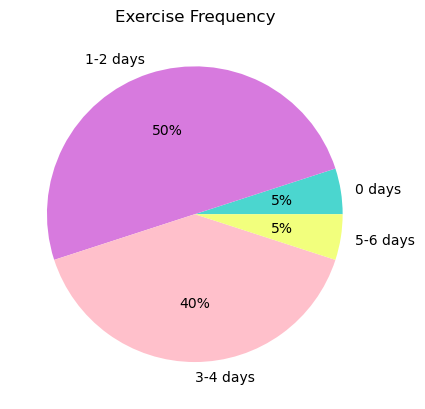

In [11]:
daysGroup = exerciseDF.groupby("days_exercised")

plt.pie(x=daysGroup.size(), 
        labels=daysGroup.size().index, 
        autopct= "%1.0f%%", 
        colors=["#4bd6cf", "#d77ade", "pink", "#f2ff7d"])
plt.title("Exercise Frequency")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

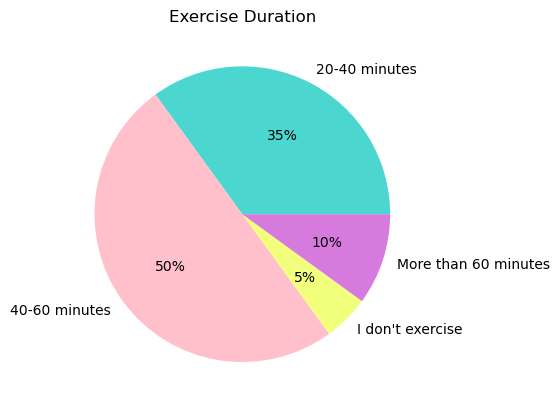

In [12]:
durationGroup = exerciseDF.groupby("exercise_length")

plt.pie(x=durationGroup.size(), 
        labels=durationGroup.size().index, 
        autopct= "%1.0f%%", 
        colors=["#4bd6cf", "pink", "#f2ff7d",  "#d77ade"])
plt.title("Exercise Duration")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

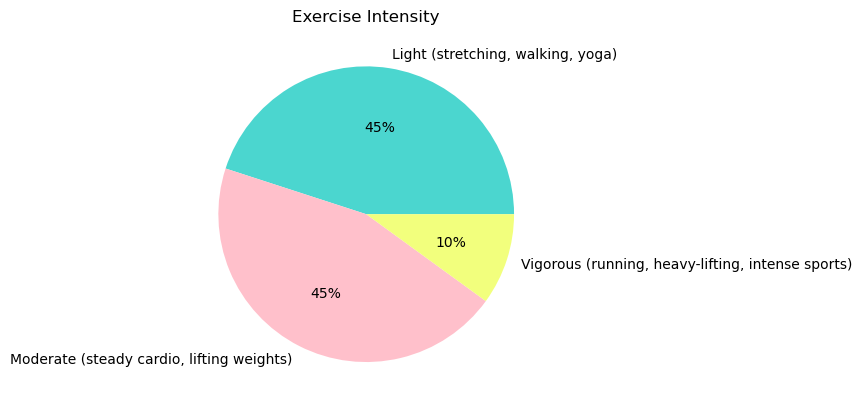

In [13]:
intensityGroup = exerciseDF.groupby("intensity")

plt.pie(x=intensityGroup.size(), 
        labels=intensityGroup.size().index, 
        autopct= "%1.0f%%", 
        colors=["#4bd6cf", "pink", "#f2ff7d",  "#d77ade"])
plt.title("Exercise Intensity")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

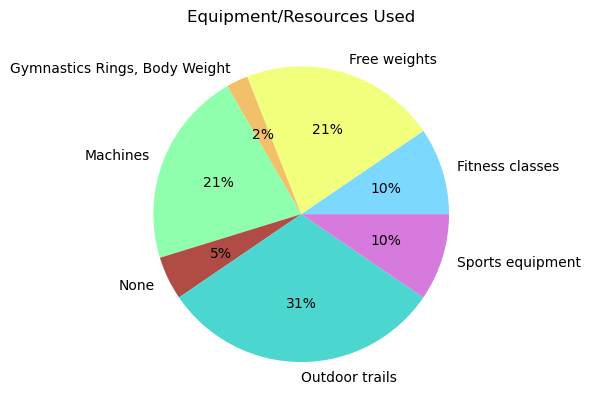

In [14]:
explodedEquip = exerciseDF.explode("equipment_used")
equip_counts = explodedEquip.groupby("equipment_used").size()

plt.pie(x=equip_counts, 
        labels=equip_counts.index, 
        autopct= "%1.0f%%", 
        colors=["#7dd8ff", "#f2ff7d", "#f2c068", "#8fffad", "#b04c45", "#4bd6cf", "#d77ade", "pink"])
plt.title("Equipment/Resources Used")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

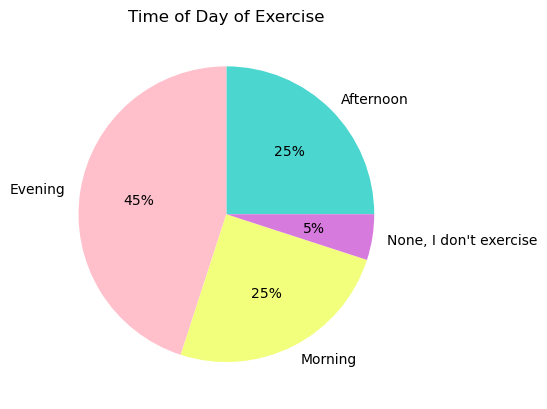

In [15]:
timeGroup = exerciseDF.groupby("time_of_exercise")

plt.pie(x=timeGroup.size(), 
        labels=timeGroup.size().index, 
        autopct= "%1.0f%%", 
        colors=["#4bd6cf", "pink", "#f2ff7d",  "#d77ade"])
plt.title("Time of Day of Exercise")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

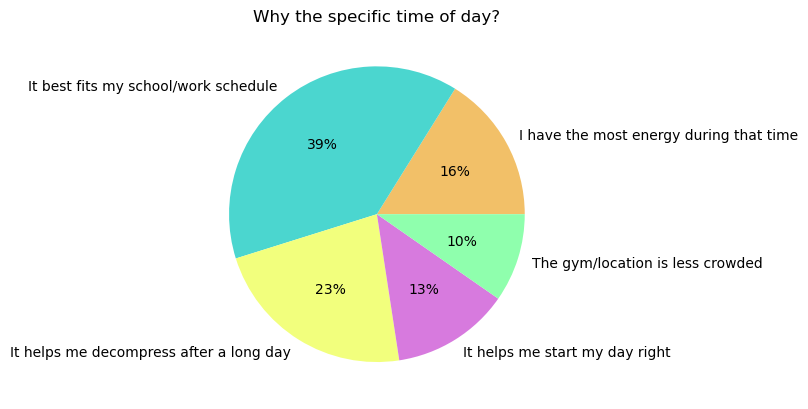

In [16]:
explodedWhyTime = exerciseDF.explode("why_time")
why_time_counts = explodedWhyTime.groupby("why_time").size()

plt.pie(x=why_time_counts, 
        labels=why_time_counts.index, 
        autopct= "%1.0f%%", 
        colors=["#f2c068", "#4bd6cf", "#f2ff7d",  "#d77ade",  "#8fffad"])
plt.title("Why the specific time of day?")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

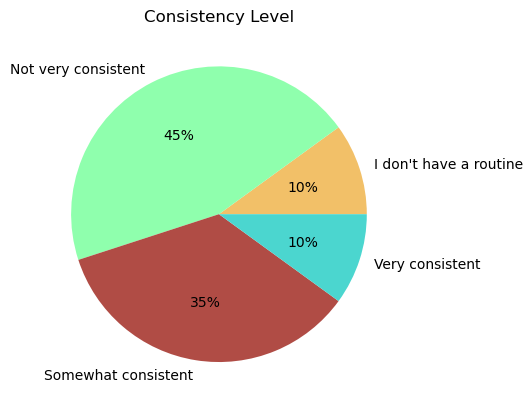

In [17]:
consistencyGroup = exerciseDF.groupby("consistency_level")

plt.pie(x=consistencyGroup.size(), 
        labels=consistencyGroup.size().index, 
        autopct= "%1.0f%%", 
        colors=["#f2c068", "#8fffad", "#b04c45", "#4bd6cf", "#d77ade"])
plt.title("Consistency Level")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

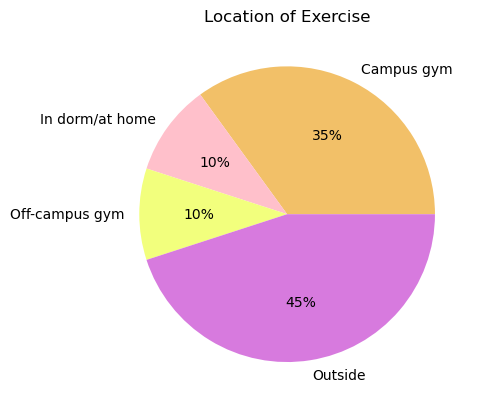

In [18]:
locationGroup = exerciseDF.groupby("exercise_location")

plt.pie(x=locationGroup.size(), 
        labels=locationGroup.size().index, 
        autopct= "%1.0f%%", 
        colors=["#f2c068", "pink", "#f2ff7d",  "#d77ade", "#d77ade"])
plt.title("Location of Exercise")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

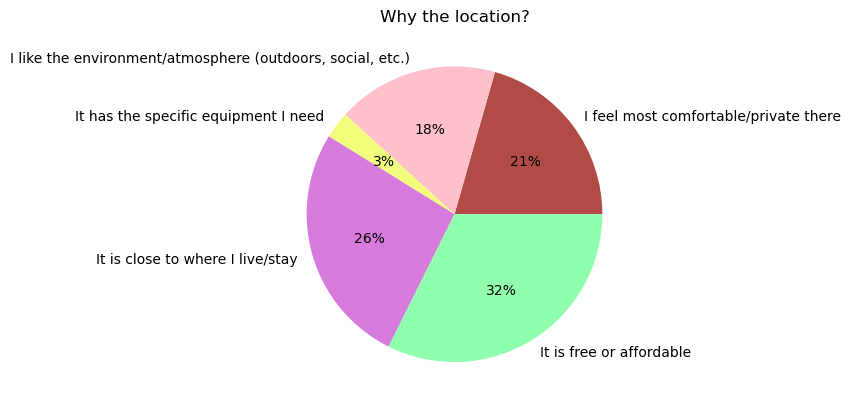

In [19]:
explodedWhyLoc = exerciseDF.explode("why_location")
why_loc_counts = explodedWhyLoc.groupby("why_location").size()

plt.pie(x=why_loc_counts, 
        labels=why_loc_counts.index, 
        autopct= "%1.0f%%", 
        colors=["#b04c45", "pink", "#f2ff7d",  "#d77ade",  "#8fffad"])
plt.title("Why the location?")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

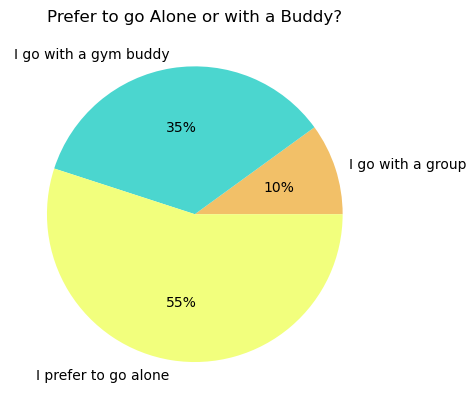

In [20]:
aloneGroup = exerciseDF.groupby("alone_or_team")

plt.pie(x=aloneGroup.size(), 
        labels=aloneGroup.size().index, 
        autopct= "%1.0f%%", 
        colors=["#f2c068", "#4bd6cf", "#f2ff7d",  "#d77ade", "#d77ade"])
plt.title("Prefer to go Alone or with a Buddy?")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

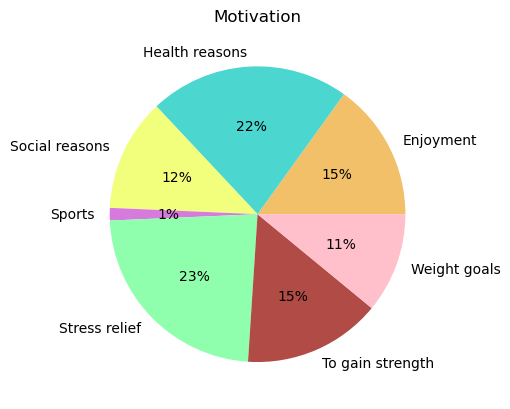

In [21]:
explodedMotive = exerciseDF.explode("motivation")
motivation_counts = explodedMotive.groupby("motivation").size()

plt.pie(x=motivation_counts, 
        labels=motivation_counts.index, 
        autopct= "%1.0f%%", 
        colors=["#f2c068", "#4bd6cf", "#f2ff7d",  "#d77ade",  "#8fffad", "#b04c45", "pink"])
plt.title("Motivation")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

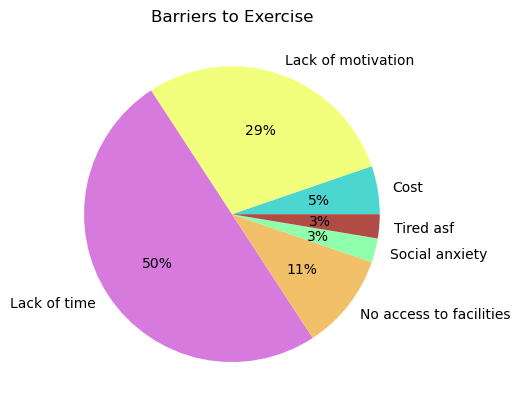

In [22]:
explodedBarriers = exerciseDF.explode("barriers")
barriers_counts = explodedBarriers.groupby("barriers").size()

plt.pie(x=barriers_counts, 
        labels=barriers_counts.index, 
        autopct= "%1.0f%%", 
        colors=[ "#4bd6cf", "#f2ff7d",  "#d77ade", "#f2c068",  "#8fffad", "#b04c45"])
plt.title("Barriers to Exercise")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

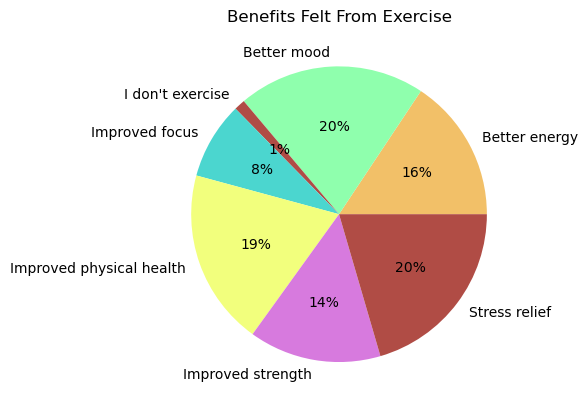

In [23]:
explodedBenefits = exerciseDF.explode("benefits")
benefits_counts = explodedBenefits.groupby("benefits").size()

plt.pie(x=benefits_counts, 
        labels=benefits_counts.index, 
        autopct= "%1.0f%%", 
        colors=[ "#f2c068", "#8fffad", "#b04c45", "#4bd6cf", "#f2ff7d",  "#d77ade", "#b04c45", "pink"])
plt.title("Benefits Felt From Exercise")

plt.show